# Consulta e Preparação de Dados
### CMC-13 - Introdução à Ciência de Dados

* Emanuel Reinaldo Gomes Bezerra
* Pedro Pinheiro Borges

In [40]:
import pandas as pd

### Leitura dos Arquivos de Dados

In [41]:
books = pd.read_csv("datasets/books.csv", delimiter=';')
users = pd.read_csv("datasets/users.csv", delimiter=';')
ratings = pd.read_csv("datasets/ratings.csv", delimiter=';')

In [42]:
books.columns, users.columns, ratings.columns

(Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
        'img_l', 'Language', 'Category'],
       dtype='object'),
 Index(['user_id', 'age', 'city', 'state', 'country'], dtype='object'),
 Index(['isbn', 'user_id', 'rating'], dtype='object'))

### Criação do Dataset principal

In [43]:
ratings_users = pd.merge(ratings, users, on="user_id", how="inner")
dataset = pd.merge(ratings_users, books, on="isbn", how="inner").dropna()

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19720 entries, 0 to 20701
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isbn                 19720 non-null  object 
 1   user_id              19720 non-null  int64  
 2   rating               19720 non-null  int64  
 3   age                  19720 non-null  float64
 4   city                 19720 non-null  object 
 5   state                19720 non-null  object 
 6   country              19720 non-null  object 
 7   book_title           19720 non-null  object 
 8   book_author          19720 non-null  object 
 9   year_of_publication  19720 non-null  float64
 10  publisher            19720 non-null  object 
 11  img_l                19720 non-null  object 
 12  Language             19720 non-null  object 
 13  Category             19720 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 2.3+ MB


#### Remoção de Colunas
Removemos ``isbn`` e ``user_id`` pois são identificadores e não possuem informação atrelada a eles.

Removemos ``img_l`` porque é apenas um link para a imagem da capa do livro, sem informação atrelada ao livro.

Removemos ``Language`` porque apresenta dois valores únicos (``en`` e ``9``) com pouca ou nenhuma informação atrelada, pois ``9`` não é um indicativo adequado para idioma.

In [45]:
dataset.Language.unique()

array(['en', '9'], dtype=object)

In [46]:
dataset = dataset.drop(columns=["isbn", "user_id", "Language", "img_l"])

Removemos as colunas ``city``, ``state``, ``country``

In [47]:
print(len(dataset.country.unique()), len(dataset.state.unique()), len(dataset.city.unique()))

147 652 5616


In [51]:
dataset = dataset.drop(columns=["country", "state", "city"])

Análise das colunas ``book_author`` e ``book_title``

In [75]:
len(dataset.book_author.unique())

426

In [74]:
len(dataset.book_author.str.lower().unique())

387

<Axes: xlabel='age', ylabel='rating'>

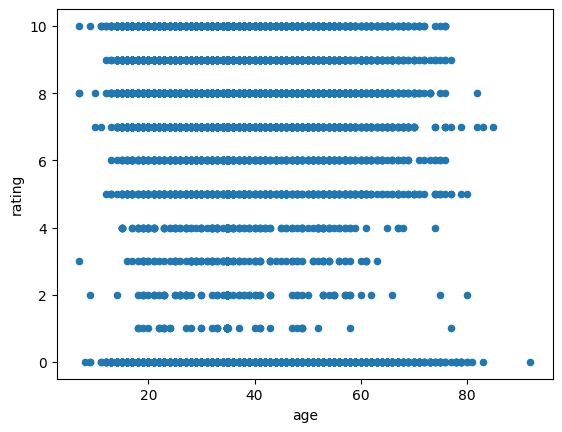

In [67]:
dataset.plot(y="rating", x="age", kind="scatter")